# Loading the dataset

In [1]:
pwd

'/Users/fidaalibaig/Desktop/CNN/CNN-task 2'

In [4]:
import os
import cv2

def read_dataset(dataset_path):
    # Dictionary to hold the images and their corresponding labels
    dataset = {'images': [], 'labels': []}

    # Iterate through the folders in the dataset directory
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        
        # Check if it's a directory
        if os.path.isdir(class_path):
            # Iterate through the images in the class folder
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                
                # Read the image
                image = cv2.imread(image_path)
                
                # Check if the image is not None
                if image is not None:
                    # Append the image to the dataset
                    dataset['images'].append(image)
                    # Append the label (class name) to the labels list
                    dataset['labels'].append(class_name)

    return dataset

# Path to the dataset folder
dataset_path = "/Users/fidaalibaig/Desktop/CNN/dataset_new_fixed"
# Read the dataset
dataset = read_dataset(dataset_path)

# Print the number of images and labels
print("Number of images:", len(dataset['images']))
print("Number of labels:", len(dataset['labels']))

Number of images: 69
Number of labels: 69


# Some Random Samples From the Dataset

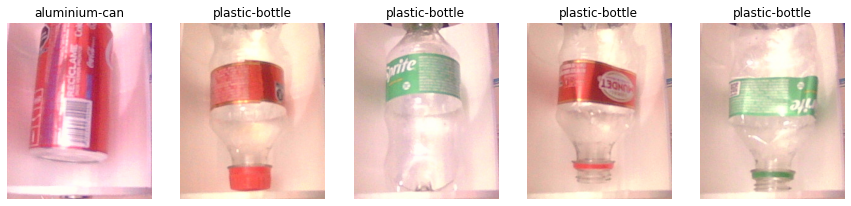

In [5]:
import random
import matplotlib.pyplot as plt

def show_random_images(dataset, num_images=5):
    # Get random indices
    random_indices = random.sample(range(len(dataset['images'])), num_images)
    
    # Plot the images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, idx in enumerate(random_indices):
        axes[i].imshow(cv2.cvtColor(dataset['images'][idx], cv2.COLOR_BGR2RGB))
        axes[i].set_title(dataset['labels'][idx])
        axes[i].axis('off')
    plt.show()

# Show 5 random images with their labels
show_random_images(dataset)

# Data Preprocessing  

In [7]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def preprocess_dataset(dataset):
    # Resize images to a fixed size (e.g., 224x224)
    resized_images = [cv2.resize(img, (224, 224)) for img in dataset['images']]
    # Convert the list to a numpy array
    resized_images = np.array(resized_images)
    
    # Normalize pixel values to the range [0, 1]
    normalized_images = resized_images.astype('float32') / 255.0
    
    # Convert labels to numeric labels
    label_encoder = LabelEncoder()
    numeric_labels = label_encoder.fit_transform(dataset['labels'])
    
    # Convert numeric labels to one-hot encoded vectors
    one_hot_labels = to_categorical(numeric_labels)
    
    return normalized_images, one_hot_labels, label_encoder

# Preprocess the dataset
X, y, label_encoder = preprocess_dataset(dataset)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the preprocessed data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (55, 224, 224, 3)
X_test shape: (14, 224, 224, 3)
y_train shape: (55, 2)
y_test shape: (14, 2)


# CNN model Building 

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        Dropout(0.3),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    return model

# Define input shape
input_shape = X_train[0].shape
# Define the number of classes
num_classes = len(label_encoder.classes_)

# Create the CNN model
model = create_cnn_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training 

In [14]:
# Define the number of epochs and batch size
epochs = 10
batch_size = 32

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.5286 - loss: 1.5296 - val_accuracy: 0.7143 - val_loss: 3.0303
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.4852 - loss: 6.1552 - val_accuracy: 0.2857 - val_loss: 0.6954
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.5286 - loss: 0.8667 - val_accuracy: 0.2857 - val_loss: 0.7675
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.5563 - loss: 0.6589 - val_accuracy: 0.9286 - val_loss: 0.6166
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.8718 - loss: 0.5660 - val_accuracy: 0.2857 - val_loss: 0.6685
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.7400 - loss: 0.4564 - val_accuracy: 0.8571 - val_loss: 0.4046
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.8509 - loss: 0.3719 - val_accuracy: 1.0000 - val_loss: 0.3685
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.9394 - loss: 0.2430 - val_accuracy: 1.0000 - val_loss: 0.2945
Epoch 9/10
2/2 

# Model Evalutions 

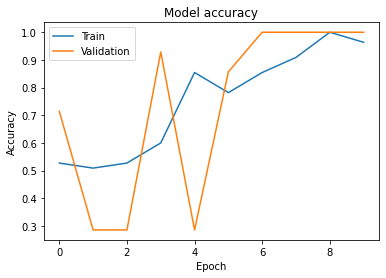

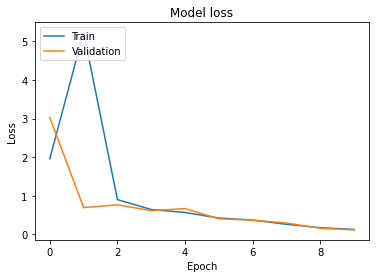

In [15]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot training history
plot_training_history(history)

# Model Predictions on test Data

In [16]:
# Generate predictions on the test set
predictions = model.predict(X_test)

# Convert predictions from one-hot encoded format to class labels
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Convert true labels from one-hot encoded format to class labels
true_labels = label_encoder.inverse_transform(np.argmax(y_test, axis=1))

# Compare predicted labels with true labels
for i in range(len(true_labels)):
    print("True label: ", true_labels[i])
    print("Predicted label: ", predicted_labels[i])
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
True label:  plastic-bottle
Predicted label:  plastic-bottle

True label:  plastic-bottle
Predicted label:  plastic-bottle

True label:  aluminium-can
Predicted label:  aluminium-can

True label:  plastic-bottle
Predicted label:  plastic-bottle

True label:  aluminium-can
Predicted label:  aluminium-can

True label:  plastic-bottle
Predicted label:  plastic-bottle

True label:  plastic-bottle
Predicted label:  plastic-bottle

True label:  plastic-bottle
Predicted label:  plastic-bottle

True label:  aluminium-can
Predicted label:  aluminium-can

True label:  plastic-bottle
Predicted label:  plastic-bottle

True label:  plastic-bottle
Predicted label:  plastic-bottle

True label:  plastic-bottle
Predicted label:  plastic-bottle

True label:  aluminium-can
Predicted label:  aluminium-can

True label:  plastic-bottle
Predicted label:  plastic-bottle



# Predictions Visulization

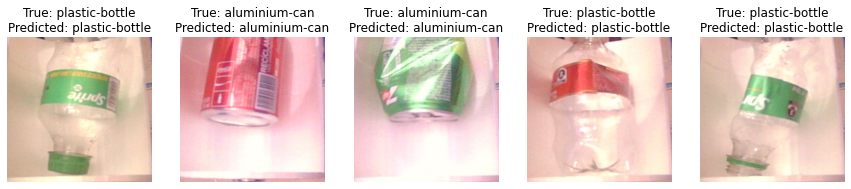

In [17]:
import random

def visualize_predictions(images, true_labels, predicted_labels, label_encoder, num_samples=5):
    # Get random indices
    random_indices = random.sample(range(len(images)), num_samples)
    
    # Plot the images with true and predicted labels
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i, idx in enumerate(random_indices):
        axes[i].imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
        axes[i].set_title(f"True: {true_labels[idx]}\nPredicted: {predicted_labels[idx]}")
        axes[i].axis('off')
    plt.show()

# Visualize some predictions
visualize_predictions(X_test, true_labels, predicted_labels, label_encoder)

# Saving The Model

In [24]:
# Save the model
model.save('mymodel.h5')

print("Model saved successfully")

Model saved successfully
